In [140]:
import pandas as pd
import os
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## House prices

In [141]:
sales = pd.read_csv("milan_housing.csv", header=0)
sales[['Quarter', 'Year']] = sales['Select time'].str.split('-', expand=True)
sales = sales[sales['Measure'] == 'index number']
sales['Year'] = sales['Year'].astype(int)
to_drop = ['ITTER107', 'Territory', 'Measure', 'Index type', 'TIPO_DATO2', 'MISURA1', 'TYPPURCH', 'TIME', 'Flag Codes', 'Flags']
sales.drop(to_drop, axis=1, inplace=True)
sales.sort_values(by=['Year', 'Quarter'], inplace=True)

all_sales = sales[sales['Purchases of dwellings'] == 'H1 - all items']
all_sales.head()

,Purchases of dwellings,Select time,Value,Quarter,Year
1,H1 - all items,Q1-2010,126.6,Q1,2010
0,H1 - all items,Q2-2010,128.5,Q2,2010
3,H1 - all items,Q3-2010,128.9,Q3,2010
2,H1 - all items,Q4-2010,127.5,Q4,2010
4,H1 - all items,Q1-2011,124.4,Q1,2011


/var/folders/_v/2m0mxgk14csgpyktpk5mjh_40000gn/T/ipykernel_24938/4110673684.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=all_sales, x='Select time', y='Value', palette='viridis', marker='o', markersize=8)


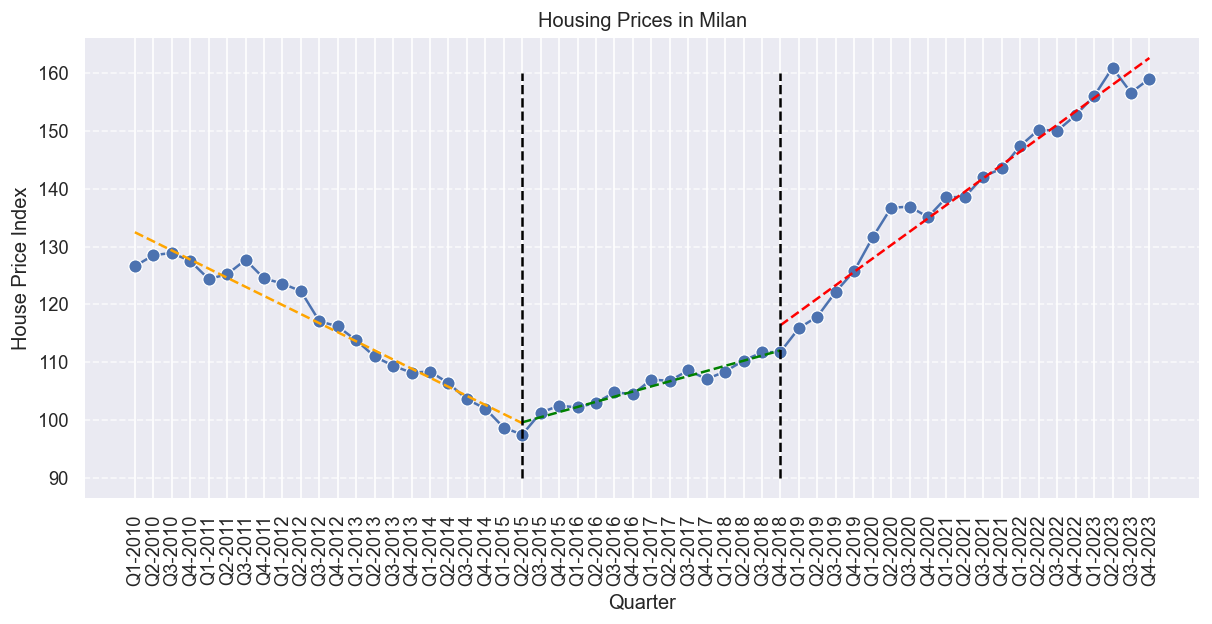

In [171]:
plt.figure(figsize=(12, 5), dpi=120)
# add linear regression line
sns.lineplot(data=all_sales, x='Select time', y='Value', palette='viridis', marker='o', markersize=8)

offset_1 = 21
offset_2 = 35

slope_0, intercept_0, *_ = stats.linregress(np.arange(offset_1+1), all_sales['Value'].iloc[:offset_1+1])
slope_1, intercept_1, *_ = stats.linregress(np.arange(offset_1, offset_2+1), all_sales['Value'].iloc[offset_1:offset_2+1])
slope_2, intercept_2, *_ = stats.linregress(np.arange(offset_2, len(all_sales)), all_sales['Value'].iloc[offset_2:])

line_0 = slope_0 * np.arange(offset_1+1) + intercept_0
line_1 = slope_1 * np.arange(offset_1, offset_2+1) + intercept_1
line_2 = slope_2 * np.arange(offset_2, len(all_sales)) + intercept_2

sns.lineplot(x=all_sales['Select time'].iloc[:offset_1+1], y=line_0, color='orange', linestyle='--', linewidth=1.5)
sns.lineplot(x=all_sales['Select time'].iloc[offset_1:offset_2+1], y=line_1, color='green', linestyle='--', linewidth=1.5)
sns.lineplot(x=all_sales['Select time'].iloc[offset_2:], y=line_2, color='red', linestyle='--', linewidth=1.5)

plt.vlines(x=offset_1, ymin=90, ymax=160, color='black', linestyle='--', linewidth=1.5)
plt.vlines(x=offset_2, ymin=90, ymax=160, color='black', linestyle='--', linewidth=1.5)

plt.title('Housing Prices in Milan')
plt.xlabel('Quarter')
plt.xticks(rotation=90)
plt.ylabel('House Price Index')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Reviews

In [172]:
reviews = pd.read_csv("milan_reviews.csv")
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
#reviews = reviews[reviews['date'] > '2014-03-31']
reviews.set_index('date', inplace=True)
reviews.head()

,listing_id
date,
2010-04-19,6400
2011-04-16,6400
2012-04-22,6400
2014-04-11,6400
2014-04-14,6400


In [173]:
monthly_counts = reviews.groupby(pd.Grouper(freq='YE')).size()
monthly_counts.index = monthly_counts.index.strftime('%Y')

quarterly_counts = reviews.groupby(pd.Grouper(freq='QE')).size()
quarterly_counts.index = ['Q'+str(idx.quarter)+'-'+str(idx.year) for idx in quarterly_counts.index]
quarterly_counts = quarterly_counts / quarterly_counts.loc['Q1-2015'] * 100

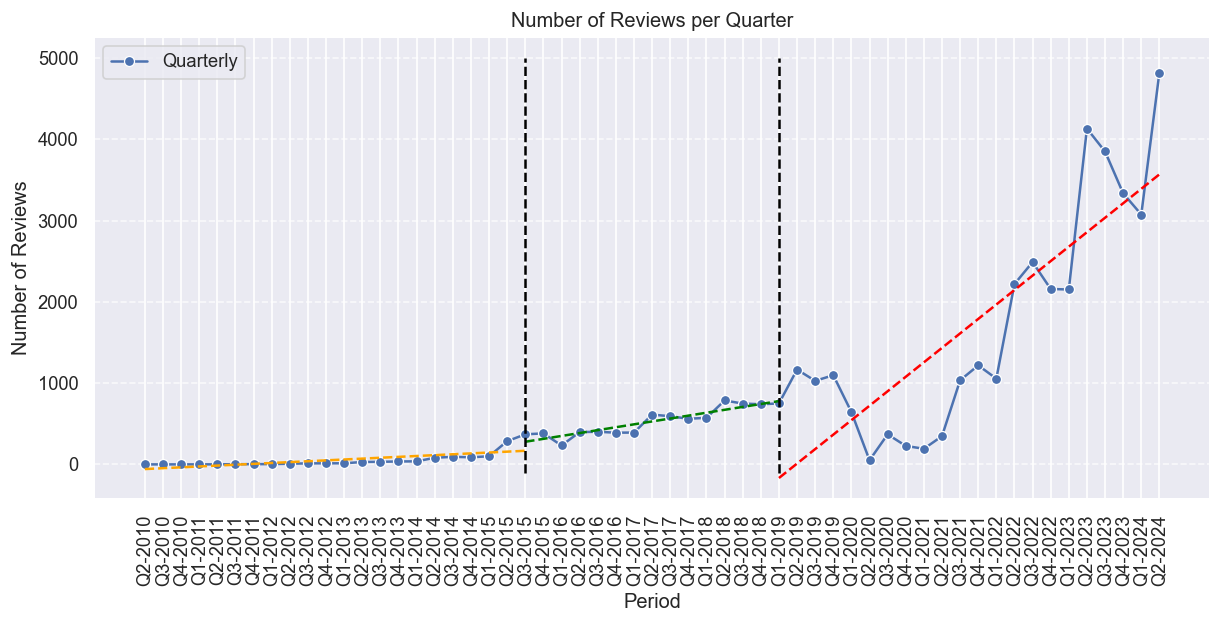

In [174]:
plt.figure(figsize=(12, 5), dpi=120)
sns.lineplot(data=quarterly_counts, marker='o', label='Quarterly')
plt.title('Number of Reviews per Quarter')
plt.xlabel('Period')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

offset_1 = 21
offset_2 = 35

slope_0, intercept_0, *_ = stats.linregress(np.arange(offset_1+1), quarterly_counts.iloc[:offset_1+1])
slope_1, intercept_1, *_ = stats.linregress(np.arange(offset_1, offset_2+1), quarterly_counts.iloc[offset_1:offset_2+1])
slope_2, intercept_2, *_ = stats.linregress(np.arange(offset_2, len(quarterly_counts)), quarterly_counts.iloc[offset_2:])

line_0 = slope_0 * np.arange(offset_1+1) + intercept_0
line_1 = slope_1 * np.arange(offset_1, offset_2+1) + intercept_1
line_2 = slope_2 * np.arange(offset_2, len(quarterly_counts)) + intercept_2

sns.lineplot(x=quarterly_counts.index[:offset_1+1], y=line_0, color='orange', linestyle='--', linewidth=1.5)
sns.lineplot(x=quarterly_counts.index[offset_1:offset_2+1], y=line_1, color='green', linestyle='--', linewidth=1.5)
sns.lineplot(x=quarterly_counts.index[offset_2:], y=line_2, color='red', linestyle='--', linewidth=1.5)

plt.vlines(x=offset_1, ymin=-100, ymax=5000, color='black', linestyle='--', linewidth=1.5)
plt.vlines(x=offset_2, ymin=-100, ymax=5000, color='black', linestyle='--', linewidth=1.5)

plt.show()